# Introduction: Exploratory Data Analysis of the Top Movies and TV Shows

In this project, we dive into a dataset featuring the top Movies and TV shows in order to explore insights and patterns in the entertainment world. First, we will clean the data and then create visualizations that show popular Movies/TV shows, genre preferences, production trends, and changes in watchtimes over the years. In the end, we will share key insights that can be leveraged by those in the entertainment industry and movie enthusiasts alike. 

# Imports

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'
import seaborn as sns
import numpy as np

# Data Collection

In [57]:
# Read in the dataset of the most watched movies and TV shows

df = pd.read_csv("flixpatrol.csv")

In [58]:
# Display information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  18164 non-null  float64
 1   Title                 18164 non-null  object 
 2   Type                  18164 non-null  object 
 3   Premiere              18030 non-null  float64
 4   Genre                 17984 non-null  object 
 5   Watchtime             18164 non-null  object 
 6   Watchtime in Million  18164 non-null  object 
dtypes: float64(2), object(5)
memory usage: 993.5+ KB
None


# Data Cleaning

In [59]:
# There are some missing values in the Genre and Premiere columns. The missing Premiere fields will be set to NaN and the missing Genre fields will be set to Unknown to allow for easier data analysis and plotting.

df['Premiere'] = pd.to_numeric(df['Premiere'], errors='coerce')
df['Genre'].fillna('Unknown', inplace=True)

C:\Users\Akhila Ravikumar\AppData\Local\Temp\ipykernel_14500\10671432.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [60]:
# The Rank column needs to be converted from a float to an integer

df['Rank'] = df['Rank'].astype(int)

In [61]:
# The Watchtime values need their commas removed and they need to be converted into integers.

df['Watchtime'] = df['Watchtime'].astype(str).str.replace(',', '').astype(int)

# Exploratory Data Analysis

## What are the most popular Movies/TV Shows?

In [62]:
df.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023.0,Action,812100000,812.1M
1,2,Ginny & Georgia,TV Show,2021.0,Drama,665100000,665.1M
2,3,The Glory,TV Show,2022.0,Thriller,622800000,622.8M
3,4,Wednesday,TV Show,2022.0,Fantasy,507700000,507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,503000000,503.0M


## What are the most popular Movies?

C:\Users\Akhila Ravikumar\AppData\Local\Temp\ipykernel_14500\1754713237.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




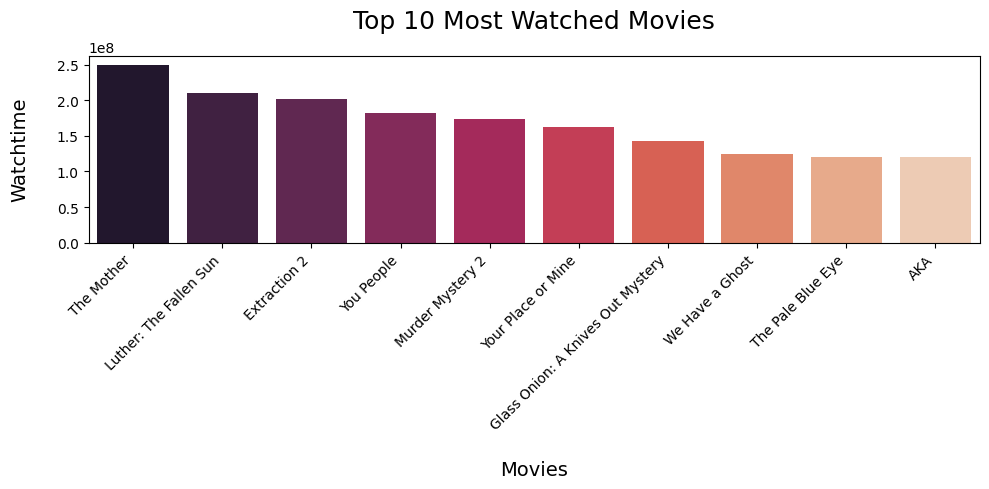

In [63]:
# Filter the Movie Data
movie_data = df[df['Type'] == 'Movie']

# Select the top 10 movies based on their watchtimes
top_10_movies = movie_data.nlargest(10, 'Watchtime')

# Plot a Bar Chart of the top 10 most watched movies
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_movies, x='Title', y='Watchtime', palette='rocket')
plt.xlabel('Movies', labelpad = 20, fontsize=14)
plt.ylabel('Watchtime', labelpad= 20, fontsize=14)
plt.title('Top 10 Most Watched Movies', pad = 20, fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## What are the most popular TV Shows?

C:\Users\Akhila Ravikumar\AppData\Local\Temp\ipykernel_14500\2785006452.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




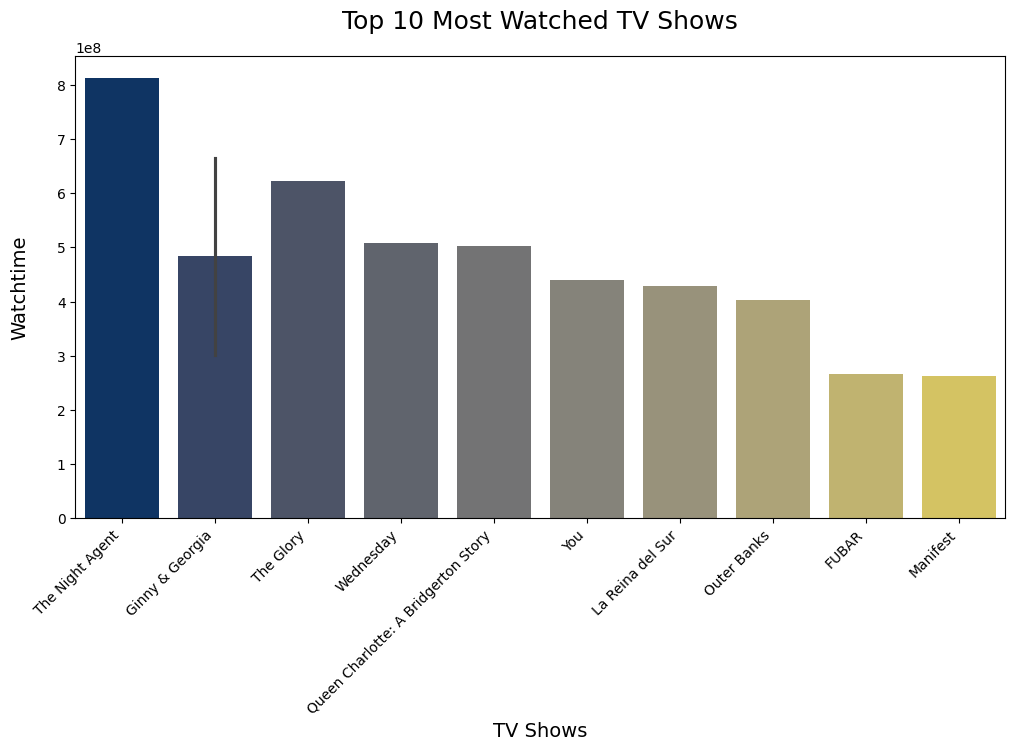

In [64]:
# Filter the TV Show Data
tv_data = df[df['Type'] == 'TV Show']

# Select the top 10 TV shows based on their watchtimes
top_10_tv = tv_data.nlargest(11, 'Watchtime').sort_values(by='Watchtime', ascending=False) # Fubar and Manifest have the same watchtime

# Plot a Bar Chart of the top 10 most watched TV shows
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_tv, x='Title', y='Watchtime', palette='cividis')
plt.xlabel('TV Shows', fontsize=14)
plt.ylabel('Watchtime', labelpad = 20, fontsize=14)
plt.title('Top 10 Most Watched TV Shows',pad=20,fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.show()

## What are the most popular Genres?

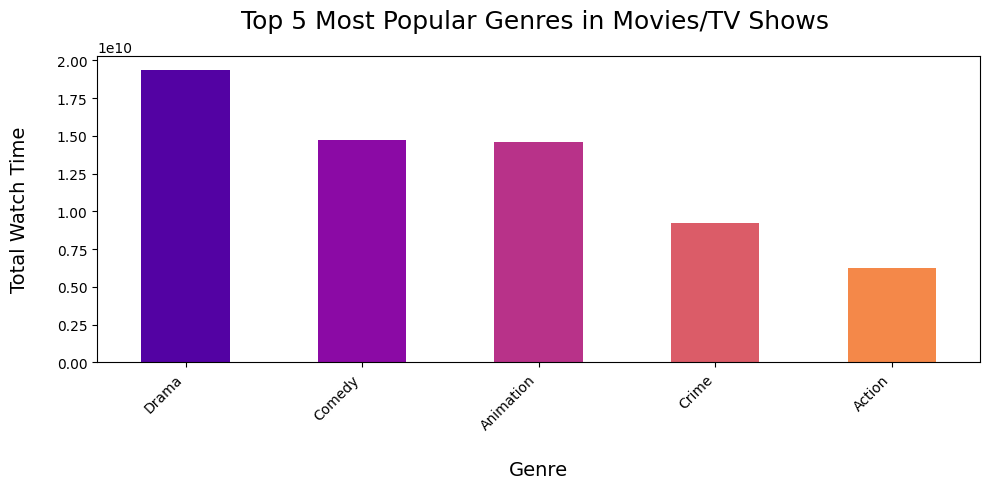

In [65]:
# Find the total watchtime for each genre
genre_watchtime = df.groupby('Genre')['Watchtime'].sum()

# Sort the total watchtimes in descending order
most_popular_genres = genre_watchtime.sort_values(ascending=False)

# Plot a Bar Chart of the top 5 most popular genres
plt.figure(figsize=(10, 5))
custom_color3 = sns.color_palette("plasma")
most_popular_genres.head(5).plot(kind='bar', color=custom_color3)
plt.title('Top 5 Most Popular Genres in Movies/TV Shows ', pad = 20, fontsize=18)
plt.xlabel('Genre', labelpad=20, fontsize=14)
plt.ylabel('Total Watch Time', labelpad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()

## Have there been more Movies or TV Shows produced over the years?

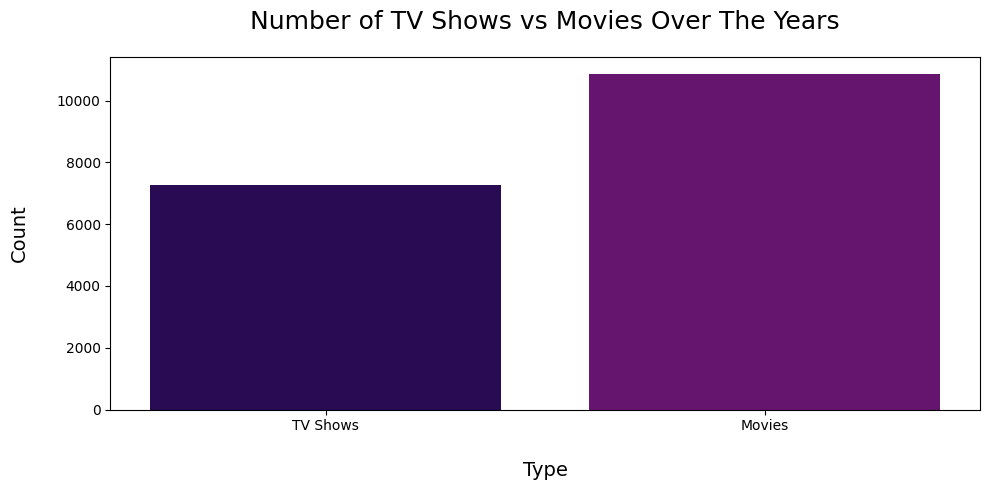

In [66]:
# Filter the data based on if it is a TV Show or a Movie
tv_shows_df = df[df['Type'] == 'TV Show']
movies_df = df[df['Type'] == 'Movie']

# Find the number of TV shows and movies
tv_shows_number = len(tv_shows_df)
movies_number = len(movies_df)

# Plot a Bar Chart of the Number of TV Shows vs Movies Produced Over the Years
plt.figure(figsize=(10, 5))
custom_palette2 = sns.color_palette("inferno")
plt.bar(['TV Shows', 'Movies'], [tv_shows_number, movies_number], color=custom_palette2)
plt.xlabel('Type', labelpad=20, fontsize=14)
plt.ylabel('Count', labelpad=20, fontsize=14)
plt.title('Number of TV Shows vs Movies Over The Years',pad=20, fontsize=18)
plt.tight_layout()
plt.grid(False)
plt.show()

## What Premiere Years are included in this dataset?

In [67]:
# Find the unique Premiere years 

df['Premiere'].unique()

array([2023., 2021., 2022., 2018., 2011., 2020., 2012., 2013., 2010.,
       2016., 2003., 2019., 2008., 2017., 2000., 2004., 2015., 2014.,
       2009., 1996., 2005., 1994., 2007., 2001., 1989., 1997., 2006.,
       2002., 1993.,   nan, 1999., 1995., 1972., 1983., 1978., 1998.,
       1974., 1986., 1988., 1991., 1976., 1985., 1987., 1992., 1977.,
       1990., 1979., 1973., 1982., 1966., 1984., 1980., 1975., 1940.,
       1963., 1970., 1981., 1964., 1960., 1971., 1968., 1969., 1962.,
       1954., 1961., 1953., 1957., 1956., 1958., 1965., 1951., 1955.,
       1967., 1952.])

## How have Watchtimes changed based on the Premiere year?

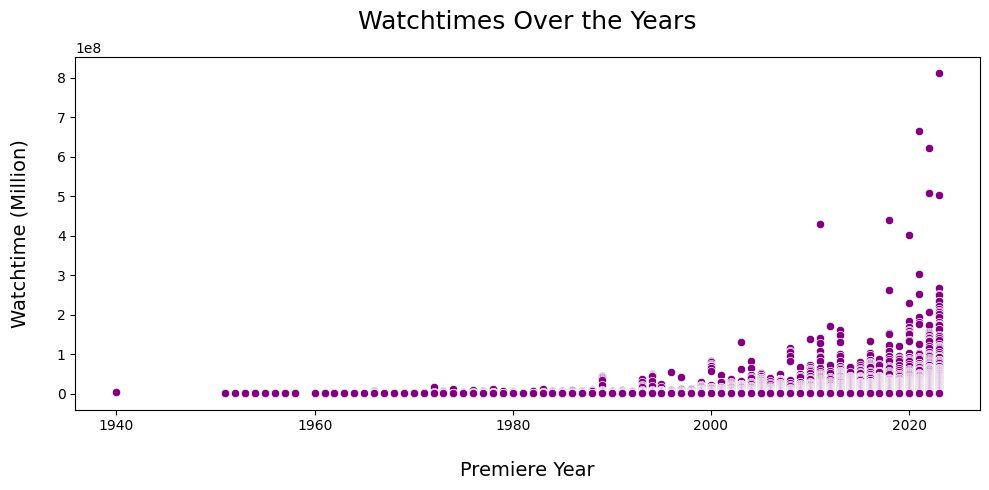

In [68]:
# Scatterplot of the Watchtimes of movies and tv shows as a function of the Premiere year

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Premiere', y='Watchtime', data=df, color='purple')
plt.title('Watchtimes Over the Years', pad=20, fontsize=18)
plt.xlabel('Premiere Year', labelpad=20, fontsize=14)
plt.ylabel('Watchtime (Million)', labelpad=20, fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()



# Key Insights

* **The Top 5 Movies or TV Shows are:** The Night Agent **(#1)**, Ginny & Georgia **(#2)**, The Glory **(#3)**, Wednesday **(#4)**, and Queen Charlotte: A Bridgerton Story **(#5)**
* **The Top 10 Most Watched Movies are:** The Mother, Luther:The Fallen Sun, Extraction 2, You People, Murder Mystery 2, Your Place or Mine, Glass Onion: A Knives Out Mystery, We Have a Ghost, The Pale Blue Eye, and AKA
* **The Top 10 Most Watched TV Shows are:** The Night Agent, Ginny & Georgia, The Glory, Wednesday, Queen Charlotte: A Bridgerton Story, You, La Reina del Sur, Outer Banks, FUBAR, and Manifest.
* **The Top 5 Most Popular Genres in TV and Movies are:** Drama, Comedy, Animation, Crime, and Action 
* There have been more **Movies** than TV Shows over the years
* The aggreggate **Watchtime** of Movies and TV Shows has **increased notably** in recent years compared to the 1950s and 1960s
